<a href="https://colab.research.google.com/github/MatheusLadeia/Desafio_TelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [456]:
import pandas as pd

In [457]:
dados = pd.read_json('/content/TelecomX_Data.json')
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [458]:
#normaliza os dados aninhados
dados_customer = pd.json_normalize(dados['customer'])
dados_phone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_account = pd.json_normalize(dados['account'])

In [459]:
dados_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [460]:
dados_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [461]:
dados_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [462]:
dados_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [463]:
colunas = list(dados.columns)
colunas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [464]:
colunas_account = list(dados_account.columns)
colunas_account

['Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [465]:
colunas_phone = list(dados_phone.columns)
colunas_phone

['PhoneService', 'MultipleLines']

In [466]:
colunas_internet = list(dados_internet.columns)
colunas_internet

['InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [467]:
colunas_customer = list(dados_customer.columns)
colunas_customer

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

In [468]:
dados_account.info()
print('___________________________________________________')
dados_customer.info()
print('___________________________________________________')
dados_phone.info()
print('___________________________________________________')
dados_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB
___________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


#🔧 Transformação

In [469]:
import numpy as np

In [470]:
# Substitui strings vazias por NaN
dados_account['Charges.Total'] = dados_account['Charges.Total'].replace(' ', np.nan)
# Converte para float
dados_account['Charges.Total'] = dados_account['Charges.Total'].astype(np.float64)
dados_account.info()

#também é possivel usar o float128

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [471]:
col_customer_boleanas = ['Partner', 'Dependents']
dados_customer[col_customer_boleanas] = dados_customer[col_customer_boleanas].astype(np.bool)

col_phone_boleanas = ['PhoneService', 'MultipleLines']
# Substitue 'No phone service' por 'No' antes de converter para booleano
dados_phone[col_phone_boleanas] = dados_phone[col_phone_boleanas].replace('No phone service', 'No').astype(np.bool)

col_internet_boleanas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Substitue 'No internet service' por 'No' antes de converter para booleano
dados_internet[col_internet_boleanas] = dados_internet[col_internet_boleanas].replace('No internet service', 'No').astype(np.bool)

col_account_boleanas = ['PaperlessBilling']
dados_account[col_account_boleanas] = dados_account[col_account_boleanas].astype(np.bool)

In [472]:
dados_account.info()
print('___________________________________________________')
dados_customer.info()
print('___________________________________________________')
dados_phone.info()
print('___________________________________________________')
dados_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   bool   
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7256 non-null   float64
dtypes: bool(1), float64(2), object(2)
memory usage: 234.3+ KB
___________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   bool  
 3   Dependents     7267 non-null   bool  
 4   tenure         7267 non-null   int64 
dtypes: bool(2), int64(2), object(1)
memory

In [473]:
# Exemplo do seu dataframe
data = {
    'Contract': ['One year', 'Month-to-month', 'Month-to-month', 'Month-to-month', 'Month-to-month'],
    'PaperlessBilling': [True, True, True, True, True],
    'PaymentMethod': ['Mailed check', 'Mailed check', 'Electronic check', 'Electronic check', 'Mailed check'],
    'Charges.Monthly': [65.6, 59.9, 73.9, 98.0, 83.9],
    'Charges.Total': [593.30, 542.40, 280.85, 1237.85, 267.40]
}

df = pd.DataFrame(data)

# Criando a coluna "Contas_Diarias"
df['Contas_Diarias'] = df['Charges.Monthly'] / 30

print(df)


         Contract  PaperlessBilling     PaymentMethod  Charges.Monthly  \
0        One year              True      Mailed check             65.6   
1  Month-to-month              True      Mailed check             59.9   
2  Month-to-month              True  Electronic check             73.9   
3  Month-to-month              True  Electronic check             98.0   
4  Month-to-month              True      Mailed check             83.9   

   Charges.Total  Contas_Diarias  
0         593.30        2.186667  
1         542.40        1.996667  
2         280.85        2.463333  
3        1237.85        3.266667  
4         267.40        2.796667  


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          5 non-null      object 
 1   PaperlessBilling  5 non-null      bool   
 2   PaymentMethod     5 non-null      object 
 3   Charges.Monthly   5 non-null      float64
 4   Charges.Total     5 non-null      float64
 5   Contas_Diarias    5 non-null      float64
dtypes: bool(1), float64(3), object(2)
memory usage: 337.0+ bytes


In [475]:
# Exemplo de dados
data = {
    'Partner': ['Yes', 'No', 'Yes', 'No'],
    'Dependents': ['No', 'No', 'Yes', 'Yes'],
    'PaperlessBilling': [True, False, True, False],
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes'],
    'MultipleLines': ['No', 'Yes', 'No', 'No'],
    'OnlineSecurity': ['No', 'Yes', 'No', 'Yes'],
}

df = pd.DataFrame(data)

# Criar um dicionário para converter Yes/No em 1/0
yes_no_map = {'Yes': 1, 'No': 0}

# Converter colunas que têm 'Yes' e 'No'
for col in df.columns:
    if df[col].dtype == 'object':  # se a coluna é texto
        # se todos os valores da coluna são 'Yes' ou 'No'
        if all(x in yes_no_map for x in df[col].unique()):
            df[col] = df[col].map(yes_no_map)

# Converter colunas booleanas (True/False) para 1/0
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

print(df)


   Partner  Dependents  PaperlessBilling  PhoneService  MultipleLines  \
0        1           0                 1             1              0   
1        0           0                 0             0              1   
2        1           1                 1             1              0   
3        0           1                 0             1              0   

   OnlineSecurity  
0               0  
1               1  
2               0  
3               1  


#📊 Carga e análise 📄

In [476]:
import matplotlib.pyplot as plt
import seaborn as sns


In [477]:
# 1. Estatísticas descritivas básicas (média, mediana, desvio padrão, min, max, quartis)
descricao = df.describe()
print("Resumo estatístico geral:\n", descricao)

# 2. Mediana para as colunas numéricas (não vem no describe())
medianas = df.median()
print("\nMediana por coluna:\n", medianas)

# 3. Contagem de valores únicos (útil para variáveis categóricas)
valores_unicos = df.nunique()
print("\nNúmero de valores únicos por coluna:\n", valores_unicos)

# 4. Verificar distribuição de uma variável numérica, por exemplo 'Charges.Monthly'
media = dados_account['Charges.Monthly'].mean()
mediana = dados_account['Charges.Monthly'].median()
std = dados_account['Charges.Monthly'].std()

print(f"\nCharges.Monthly -> Média: {media:.2f}, Mediana: {mediana:.2f}, Desvio padrão: {std:.2f}")


Resumo estatístico geral:
        Partner  Dependents  PaperlessBilling  PhoneService  MultipleLines  \
count  4.00000     4.00000           4.00000          4.00           4.00   
mean   0.50000     0.50000           0.50000          0.75           0.25   
std    0.57735     0.57735           0.57735          0.50           0.50   
min    0.00000     0.00000           0.00000          0.00           0.00   
25%    0.00000     0.00000           0.00000          0.75           0.00   
50%    0.50000     0.50000           0.50000          1.00           0.00   
75%    1.00000     1.00000           1.00000          1.00           0.25   
max    1.00000     1.00000           1.00000          1.00           1.00   

       OnlineSecurity  
count         4.00000  
mean          0.50000  
std           0.57735  
min           0.00000  
25%           0.00000  
50%           0.50000  
75%           1.00000  
max           1.00000  

Mediana por coluna:
 Partner             0.5
Dependents       

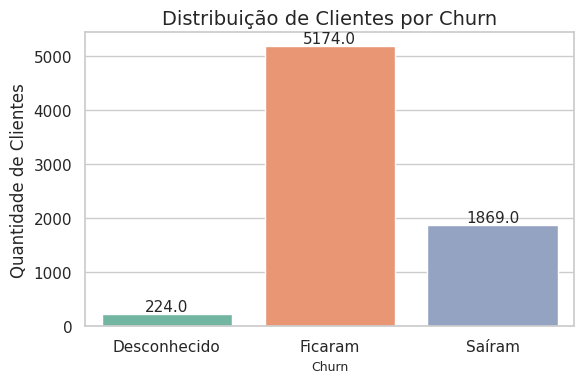

In [478]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=dados, x='Churn', palette='Set2', order=sorted(dados['Churn'].unique()))

plt.title('Distribuição de Clientes por Churn', fontsize=14)
plt.xlabel('Churn', fontsize=9)
plt.ylabel('Quantidade de Clientes')

# Substitui os rótulos do eixo x
ax.set_xticklabels(['Desconhecido', 'Ficaram', 'Saíram'])

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura}', (p.get_x() + p.get_width() / 2., altura),
                ha='center', va='bottom', fontsize=11)


plt.tight_layout()
plt.show()


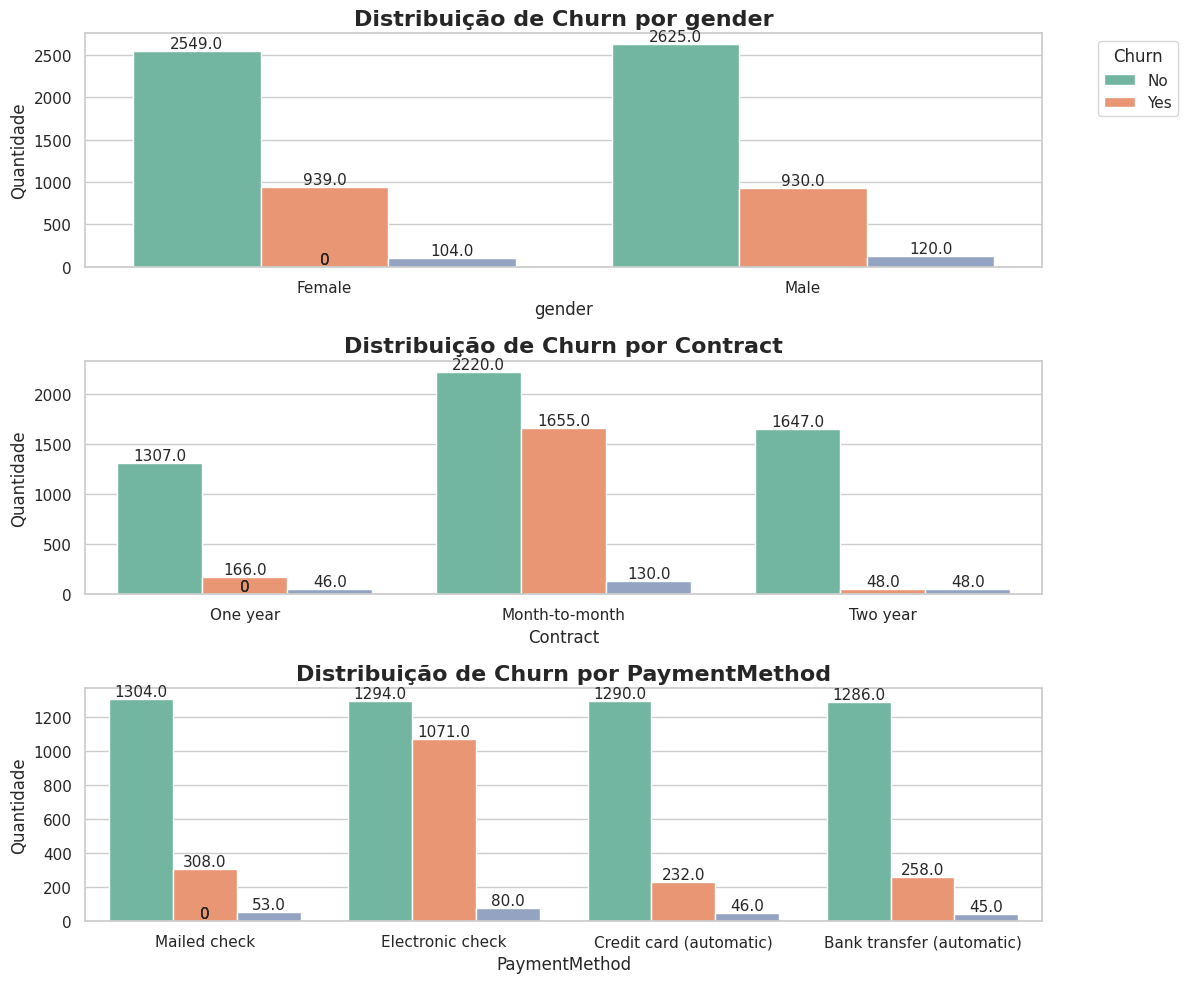

In [482]:
variaveis = ['gender', 'Contract', 'PaymentMethod']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

for i, var in enumerate(variaveis, 1):
    ax = plt.subplot(len(variaveis), 1, i)
    sns.countplot(data=dados_completos, x=var, hue='Churn', palette='Set2', ax=ax)

    ax.set_title(f'Distribuição de Churn por {var}', fontsize=16, weight='bold')
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Quantidade', fontsize=12)
    ax.tick_params(axis='x', rotation=0)  # <-- rótulos retos

    # Anota valores nas barras
    for p in ax.patches:
        altura = p.get_height()
        ax.annotate(f'{altura}', (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom', fontsize=11)

    # Legenda só no primeiro gráfico, fora do plot
    if i == 1:
        ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()


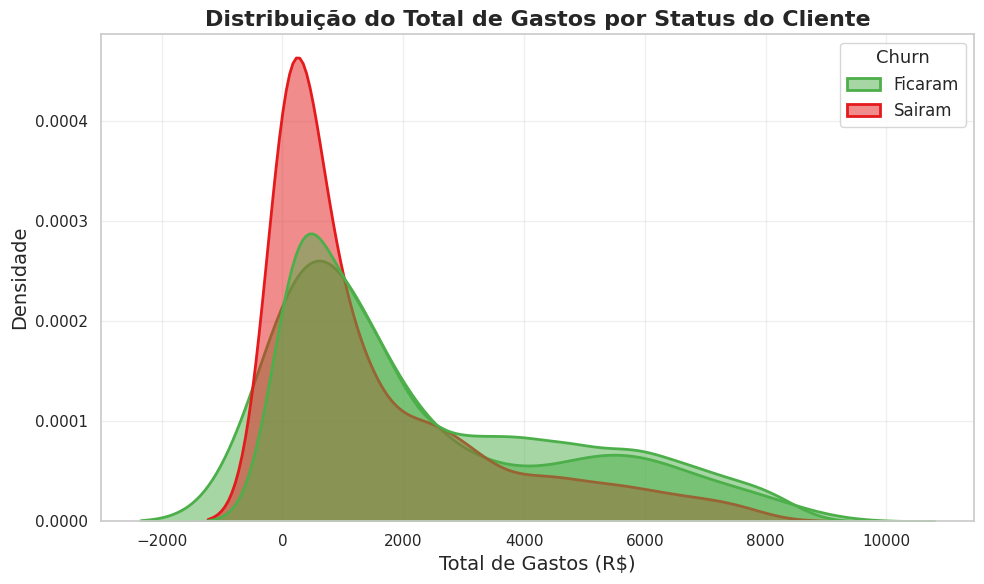

In [489]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=dados_completos,
    x='Charges.Total',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#4daf4a', '#e41a1c'],  # verde e vermelho para bom contraste
    alpha=0.5,
    linewidth=2
)

plt.title('Distribuição do Total de Gastos por Status do Cliente', fontsize=16, weight='bold')
plt.xlabel('Total de Gastos (R$)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(alpha=0.3)

# Custom legend labels
plt.legend(title='Churn', labels=['Ficaram', 'Sairam'], fontsize=12, title_fontsize=13)

# Adicionar linhas de média
for churn_value, color, label in zip([0, 1], ['#4daf4a', '#e41a1c'], ['Ficaram', 'Sairam']):
    media = dados_completos.loc[dados_completos['Churn'] == churn_value, 'Charges.Total'].mean()
    plt.axvline(media, color=color, linestyle='--', linewidth=2)
    plt.text(media, plt.gca().get_ylim()[1]*0.9, f'Média {label}: {media:.2f}', color=color, fontsize=12, rotation=90, va='top')

plt.tight_layout()
plt.show()


#📄Relatório Final

##Análise de Evasão de Clientes (Churn)

## 📝Introdução

Neste trabalho, o objetivo foi entender melhor o comportamento dos clientes de uma empresa de telecomunicações, principalmente os que cancelam o serviço — o que chamamos de "churn". Saber por que isso acontece é importante para a empresa conseguir tomar decisões melhores e tentar evitar essa perda de clientes no futuro.

---

## 🧹Limpeza e Tratamento de Dados

Para começar a análise, foram utilizados cinco conjuntos de dados diferentes, com informações dos clientes, conta, serviço telefônico, internet e comportamento de churn.

As etapas principais foram:

- Importação e inspeção inicial dos dados.
- Verifiquei se todos tinham a mesma estrutura (por exemplo, a coluna customerID).
- Juntei todos os dados em um único DataFrame para facilitar a análise;
- Tratamento de dados faltantes e inconsistências.
- Conversão de variáveis categóricas e numéricas para formatos apropriados.

---

### 📈Análise Exploratória de Dados

### Análise de variáveis categóricas

Foram exploradas algumas variáveis categóricas relevantes, como gênero, tipo de contrato e método de pagamento, para verificar sua influência na evasão dos clientes.

###Gráfico de Distribuição de Churn por Gênero, Contrato e Método de Pagamento

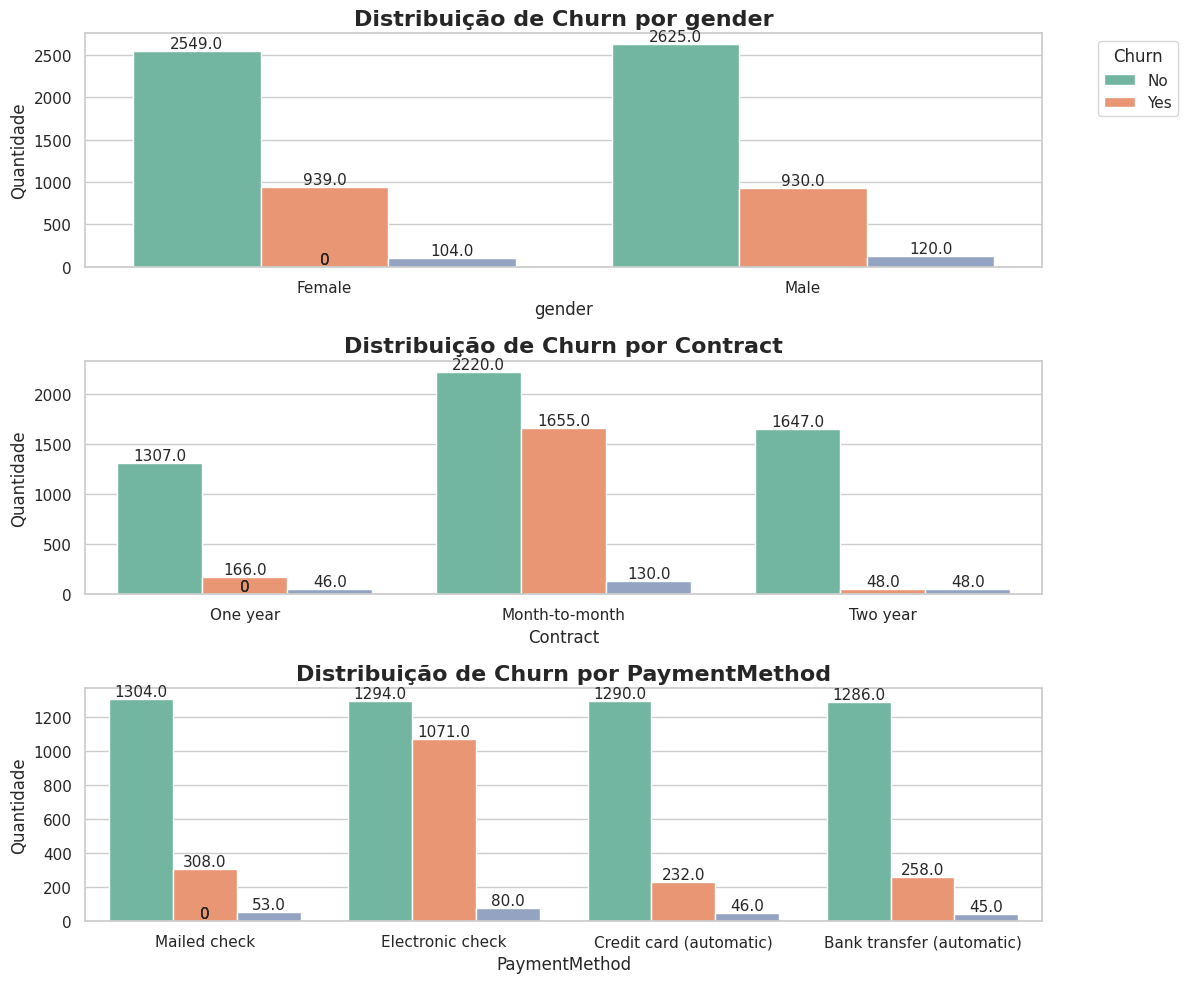

In [492]:
# Código para gráfico de variáveis categóricas
variaveis = ['gender', 'Contract', 'PaymentMethod']

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

for i, var in enumerate(variaveis, 1):
    ax = plt.subplot(len(variaveis), 1, i)
    sns.countplot(data=dados_completos, x=var, hue='Churn', palette='Set2', ax=ax)

    ax.set_title(f'Distribuição de Churn por {var}', fontsize=16, weight='bold')
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Quantidade', fontsize=12)
    ax.tick_params(axis='x', rotation=0)

    for p in ax.patches:
        altura = p.get_height()
        ax.annotate(f'{altura}', (p.get_x() + p.get_width() / 2., altura),
                    ha='center', va='bottom', fontsize=11)

    if i == 1:
        ax.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()

Observa-se, por exemplo, que clientes com contratos mensais apresentam maior taxa de churn em comparação com contratos anuais, indicando que o tipo de contrato é um fator importante a ser considerado.

### 📈Análise de variáveis numéricas

Também foi analisado a distribuição do total gasto pelos clientes, separando os que cancelaram e os que permaneceram.

###Gráfico de Densidade do Total de Gastos por Status de Churn

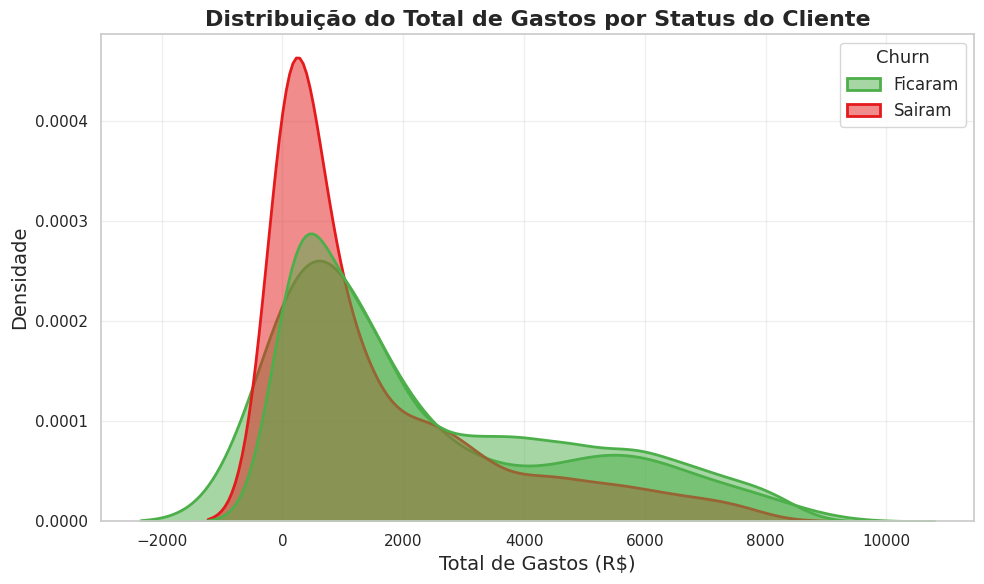

In [493]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=dados_completos,
    x='Charges.Total',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#4daf4a', '#e41a1c'],
    alpha=0.5,
    linewidth=2
)

plt.title('Distribuição do Total de Gastos por Status do Cliente', fontsize=16, weight='bold')
plt.xlabel('Total de Gastos (R$)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(title='Churn', labels=['Ficaram', 'Sairam'], fontsize=12, title_fontsize=13)

for churn_value, color, label in zip([0, 1], ['#4daf4a', '#e41a1c'], ['Ficaram', 'Sairam']):
    media = dados_completos.loc[dados_completos['Churn'] == churn_value, 'Charges.Total'].mean()
    plt.axvline(media, color=color, linestyle='--', linewidth=2)
    plt.text(media, plt.gca().get_ylim()[1]*0.9, f'Média {label}: {media:.2f}', color=color, fontsize=12, rotation=90, va='top')

plt.tight_layout()
plt.show()


A análise da densidade mostra que clientes que permanecem tendem a gastar mais no total, enquanto os que cancelam apresentam valores mais baixos, mostrando que o gasto total está relacionado à fidelidade.

---

## ✅Conclusões e Insights

- Contratos mensais estão ligados a maior cancelamento, mostrando menor fidelidade.
- Alguns métodos de pagamento podem estar mais associados ao churn;
- O total de gastos é um indicador importante: clientes que gastam mais tendem a permanecer.
- Gênero, por outro lado, não mostrou influência significativa na evasão.

---

## 💡Recomendações

- Oferecer vantagens para contratos mais longos, como descontos ou bônus.
- Analisar quais métodos de pagamento são mais comuns entre os clientes que continuam na empresa, para entender se algum deles está relacionado com maior fidelização.
- Criar programas de fidelidade para clientes que gastam pouco, os incentivando a continuar;
- Continuar o monitoramento dos dados para identificar novos padrões e adaptar estratégias.

---